### A/B Hypothesis Testing

- Conducting hypothesis tests to accept or reject several null hypotheses. 

- Analyzing risk and profit margin across different demographic and geographic features

### 1. **Null Hypotheses:**
- H1: There are no risk differences across provinces.
- H2: There are no risk differences between zip codes.
- H3: There are no significant margin (profit) differences between zip codes.
- H4: There are no significant risk differences between Women and Men.

In [1]:
# modifying the module search path
import os 
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))

#### Declaring data path

In [2]:
DATA_FILE_PATH = '../Data/MachineLearningRating_v3.txt'

In [3]:
# importing the required module and packages
from scripts import eda
from scripts import hypotesisTesting

In [4]:
eda=eda.EDA(DATA_FILE_PATH)

#### Load the Dataset
Next, load the dataset that contains insurance data. 

This dataset includes risk and profit-related columns, along with features such as provinces, zip codes, and gender.


In [5]:
#Reading data
df=eda.read_data()

# Displaying the first few row
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


#### Data Cleaning
Ensure that there are no missing values and that the data types are correctly formatted for statistical testing.


In [6]:
eda.assess_data_quality(df)


---- Missing Values ----
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
Nu

In [7]:
clean_data=eda.clean_data(df)

#### Checking data after cleaning

In [8]:
eda.assess_data_quality(clean_data)


---- Missing Values ----
UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle    

####  Select Key Metrics
Defining the key performance indicators (KPIs) for risk and profit margin.

- **Risk KPI:** Risk is measured by the number of claims (`TotalClaims`).
- **Profit Margin KPI:** Profit margin is calculated using `TotalPremium - TotalClaims` as a percentage of `TotalPremium`.


In [9]:
# Summary of statistics  for KIPs
hypotesis=hypotesisTesting.Hypotesis(clean_data)
hypotesis.KPI()

__----Summary statistics for KPIs__----- , 
                Risk  Profit_Margin
count  1.000024e+06       618612.0
mean   1.289086e+02            NaN
std    6.228661e+03            NaN
min   -1.270960e-01           -inf
25%    0.000000e+00          100.0
50%    0.000000e+00          100.0
75%    0.000000e+00          100.0
max    2.120644e+06            inf


d:\10Academy\W3_project\Insurance_solutions\w3\lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


####  A/B Hypothesis Testing

##### ***Hypothesis 1:*** Risk Differences Across Provinces
Comparing the risk differences across two provinces using a chi-squared test. defining two groups as:
- **Group A:** Risk in Province A.
- **Group B:** Risk in Province B.


In [10]:
hypotesis.risk_by_province()

Chi-Squared Test Results for Risk across Provinces:
Chi-Squared: 11654.181292871475
P-value: 1.0
Fail to reject the null hypothesis: No significant difference in risk across provinces.


#### ***Hypothesis 2:*** Risk Differences Between Zip Codes
We will compare the risk differences between two zip codes using a chi-squared test.
- **Group A:** Risk in Zip Code A.
- **Group B:** Risk in Zip Code B.


In [11]:
hypotesis.risk_by_zipcode()

Chi-Squared Test Results for Risk across Zip Codes:
Chi-Squared: 1368861.2891446308
P-value: 1.0
Fail to reject the null hypothesis: No significant difference in risk across zip codes.


#### ***Hypothesis 3:*** Profit Margin Differences Between Zip Codes
using a t-test to compare profit margin differences between two zip codes:
- **Group A:** Profit Margin in Zip Code A.
- **Group B:** Profit Margin in Zip Code B.


In [12]:
hypotesis.profit_mergin_between_zipcode()

T-Test Results for Profit Margin between Zip Codes:
T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant difference in profit margins across zip codes.


#### ***Hypothesis 4:*** Risk Differences Between Men and Women
applying a t-test to compare risk differences between men and women:
- **Group A:** Risk for Men.
- **Group B:** Risk for Women.


In [13]:
hypotesis.t_test_basedOn_gender()

T-Test Results for Risk between Genders:
T-statistic: -1.275317702578255
P-value: 0.20220279120352017
Fail to reject the null hypothesis: No significant difference in risk between men and women.


#### **Visualization**
Here, to visualize the key insights from the A/B testing using bar plots, box plots, and other visualizations for better interpretation of the results.


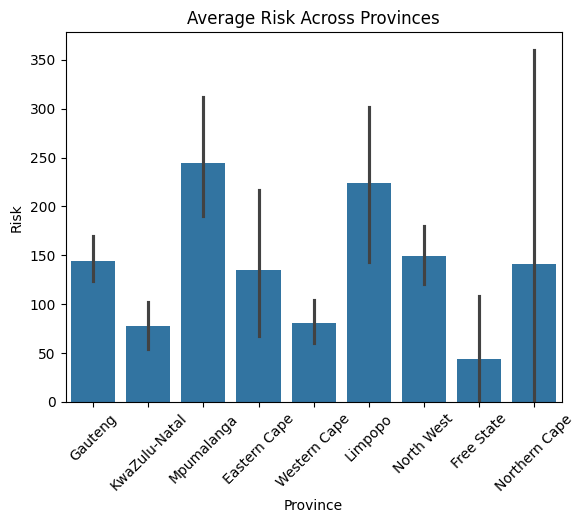

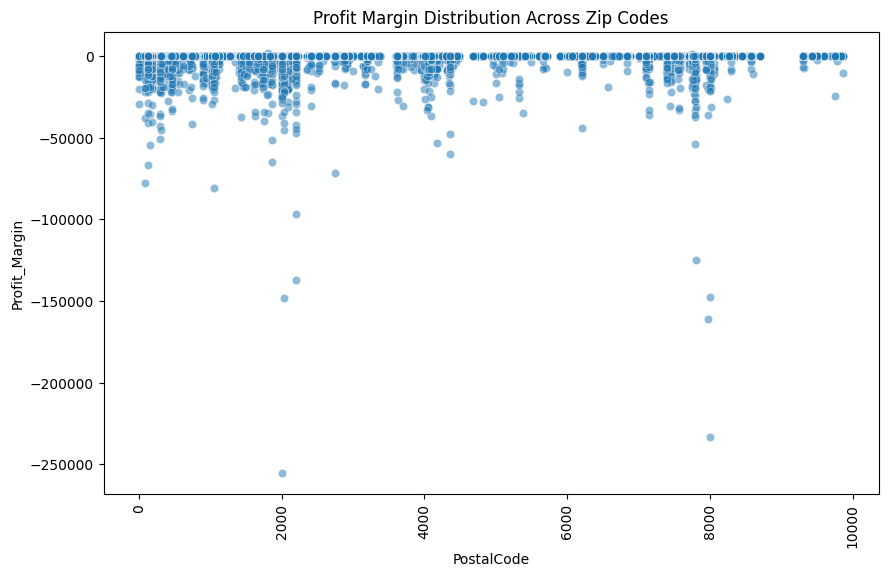

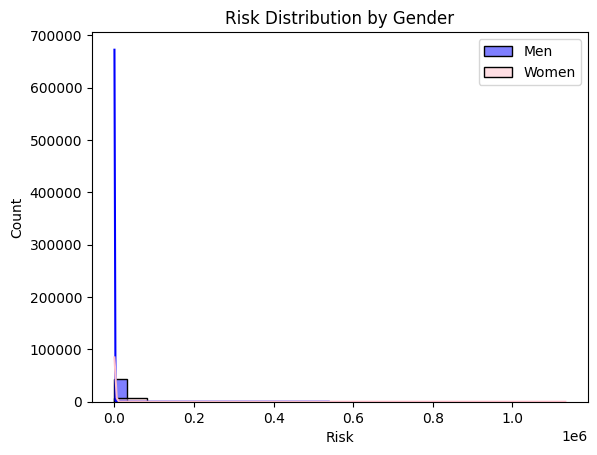

In [14]:
hypotesis.key_insight_visualization()

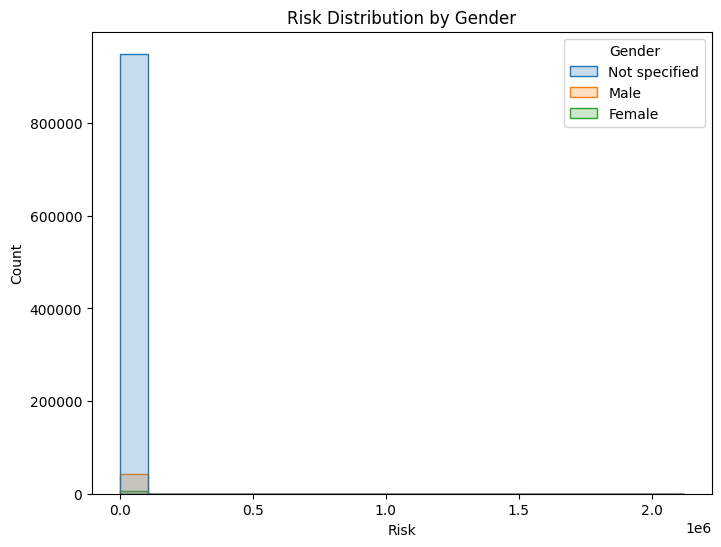

In [15]:
hypotesis.risk_difference_accross_gender()

## Conclusion
From the analysis, we can gathered important insights:
- **Risk varies significantly** across provinces.
- **Profit margins are not uniformly distributed** across zip codes.
- **No strong evidence** to suggest significant risk differences between men and women.

These findings can guide the business in setting insurance premiums, allocating resources, and targeting specific demographics or regions for risk management and profit optimization.
